In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
recent_df = pd.read_csv("./resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
recent_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [10]:
recent_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
146333,2023-02,YISHUN,5 ROOM,347A,YISHUN AVE 11,13 TO 15,112.0,DBSS,2013,89 years 09 months,838888.0
146334,2023-02,YISHUN,5 ROOM,785,YISHUN AVE 2,10 TO 12,121.0,Improved,1988,64 years 04 months,610000.0
146335,2023-02,YISHUN,5 ROOM,336C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,91 years 11 months,630000.0
146336,2023-02,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,120.0,3Gen,2018,94 years 02 months,738000.0
146337,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0


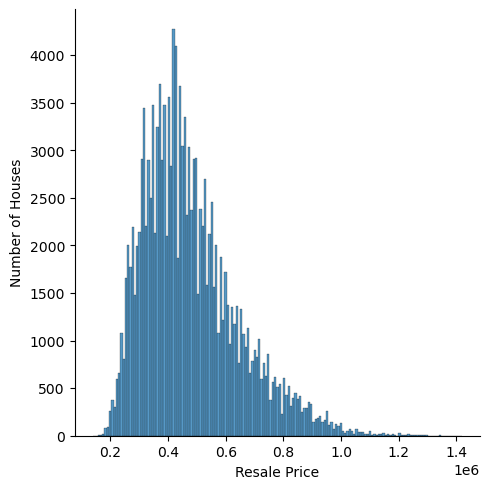

In [29]:
#Visualise resale prices
sns.displot(recent_df['resale_price']).set(xlabel="Resale Price", ylabel="Number of Houses")

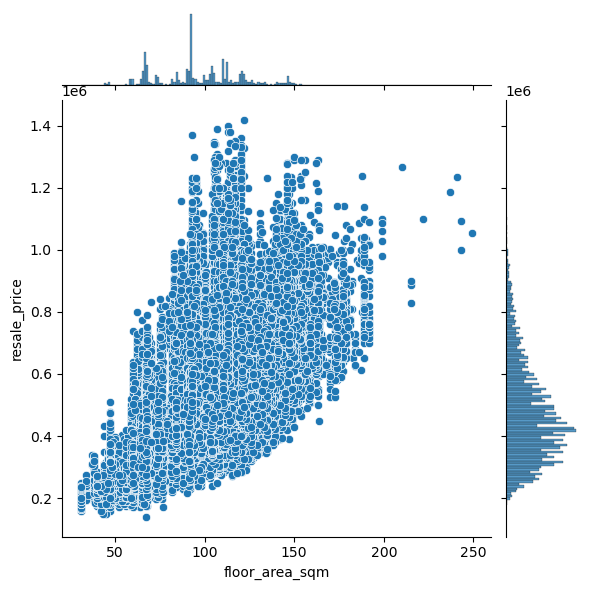

In [37]:
sns.jointplot(x=recent_df["floor_area_sqm"], y=recent_df["resale_price"])

<AxesSubplot: xlabel='count', ylabel='storey_range'>

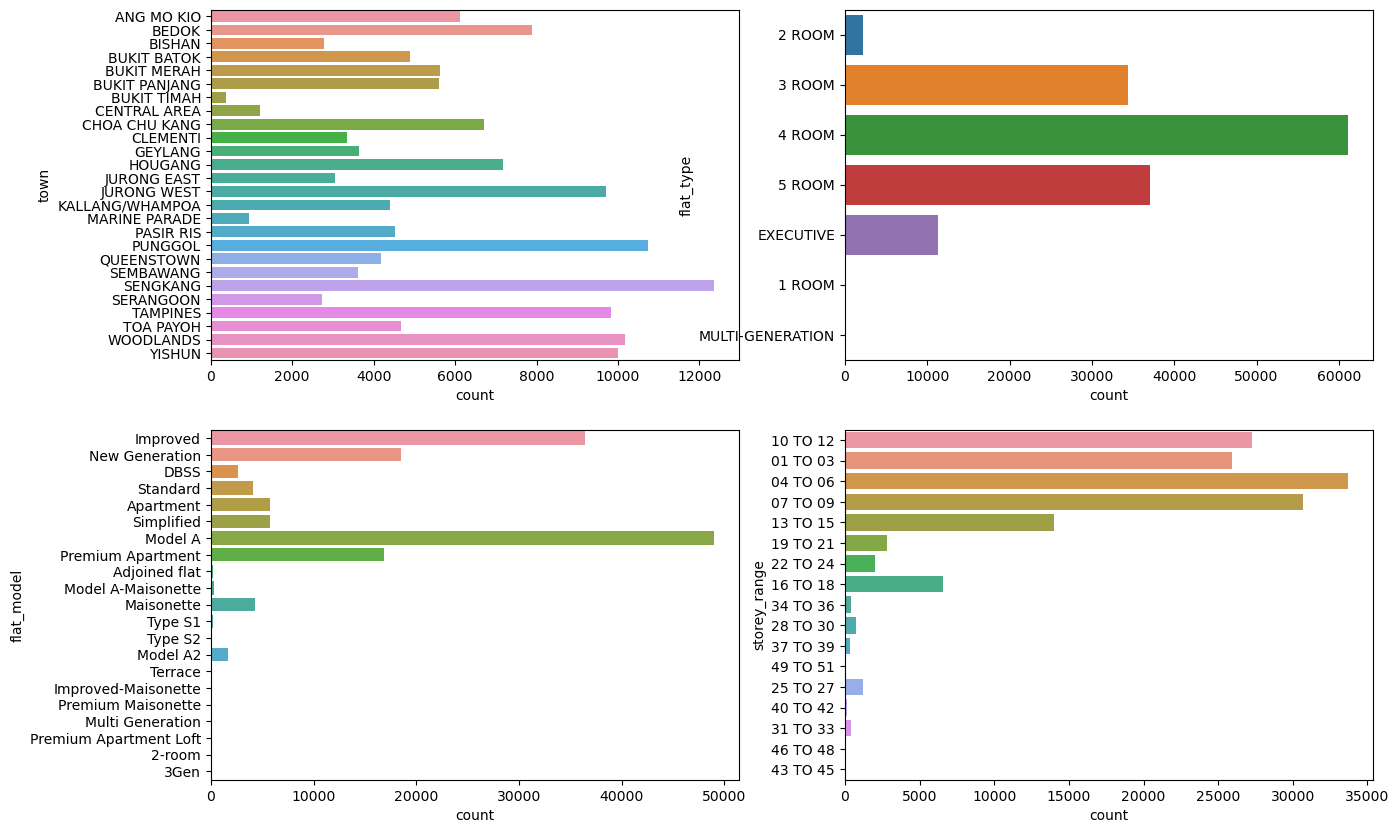

In [68]:
#Visualise other features
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
sns.countplot(y=recent_df["town"])
fig.add_subplot(2, 2, 2)
sns.countplot(y=recent_df["flat_type"])
fig.add_subplot(2, 2, 3)
sns.countplot(y=recent_df["flat_model"])
fig.add_subplot(2, 2, 4)
sns.countplot(y=recent_df["storey_range"])


In [70]:
recent_df['date'] = pd.to_datetime(recent_df["month"])
recent_df['date']

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
146333   2023-02-01
146334   2023-02-01
146335   2023-02-01
146336   2023-02-01
146337   2023-02-01
Name: date, Length: 146338, dtype: datetime64[ns]

In [80]:
#Feature Engineering
recent_df['month'] = recent_df['date'].apply(lambda date: date.month)
recent_df['year'] = recent_df['date'].apply(lambda date: date.year)

In [86]:
labels = {}
for i,town in enumerate(recent_df['town'].unique()):
    labels[town] = i
labels

{'ANG MO KIO': 0,
 'BEDOK': 1,
 'BISHAN': 2,
 'BUKIT BATOK': 3,
 'BUKIT MERAH': 4,
 'BUKIT PANJANG': 5,
 'BUKIT TIMAH': 6,
 'CENTRAL AREA': 7,
 'CHOA CHU KANG': 8,
 'CLEMENTI': 9,
 'GEYLANG': 10,
 'HOUGANG': 11,
 'JURONG EAST': 12,
 'JURONG WEST': 13,
 'KALLANG/WHAMPOA': 14,
 'MARINE PARADE': 15,
 'PASIR RIS': 16,
 'PUNGGOL': 17,
 'QUEENSTOWN': 18,
 'SEMBAWANG': 19,
 'SENGKANG': 20,
 'SERANGOON': 21,
 'TAMPINES': 22,
 'TOA PAYOH': 23,
 'WOODLANDS': 24,
 'YISHUN': 25}

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)